In [1]:
import pandas as pd


In [3]:
df_homes = pd.read_csv('data/homes.csv')

In [5]:
df_homes.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [6]:
df_describe = df_homes.describe()

In [7]:
print(df_describe)

             Sell      "List"   "Living"    "Rooms"     "Beds"    "Baths"  \
count   50.000000   50.000000  50.000000  50.000000  50.000000  50.000000   
mean   170.360000  178.340000  21.120000   8.060000   3.820000   1.860000   
std     72.755885   79.382723   8.351072   1.284285   0.690755   0.756199   
min     87.000000   90.000000  10.000000   5.000000   3.000000   1.000000   
25%    135.000000  140.000000  17.000000   7.000000   3.000000   1.000000   
50%    152.000000  160.000000  20.000000   8.000000   4.000000   2.000000   
75%    182.250000  190.000000  22.750000   9.000000   4.000000   2.000000   
max    567.000000  625.000000  64.000000  12.000000   6.000000   4.000000   

            "Age"    "Acres"       "Taxes"  
count   50.000000  50.000000     50.000000  
mean    30.220000   1.020600   3706.100000  
std     30.962314   1.191496   1579.915268  
min      2.000000   0.220000   1445.000000  
25%     12.250000   0.382500   3107.000000  
50%     24.500000   0.550000   3490.


The dataset contains 50 entries and 9 columns. 

Sell: Selling price of homes, with values ranging from 87,000 to 567,000 (mean = 170,360).
List: Listing price of homes, ranging from 90,000 to 625,000 (mean = 178,340).
Living: Living area ranging from 10 to 64 (mean = 21.12).
Rooms: Number of rooms, ranging from 5 to 12 (mean = 8.06).
Beds: Number of bedrooms, ranging from 3 to 6 (mean = 3.82).
Baths: Number of bathrooms, ranging from 1 to 4 (mean = 1.86).
"Age: Age of the home ranging from 2 to 202 (mean = 30.22).
Acres: Lot size of the home in acres, ranging from 0.22 to 6.49 (mean = 1.0206).
Taxes: Taxes ranging from 1,445 to 12,192 (mean = 3,706.1).

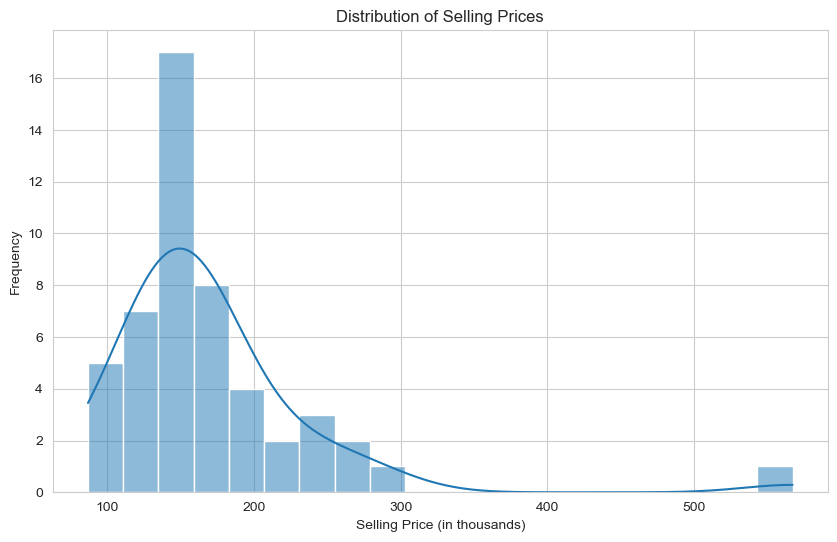

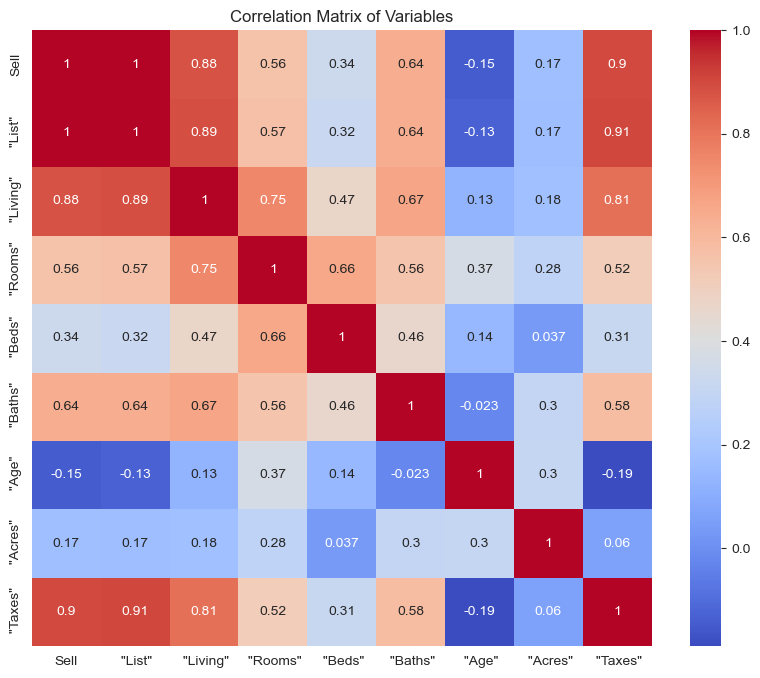

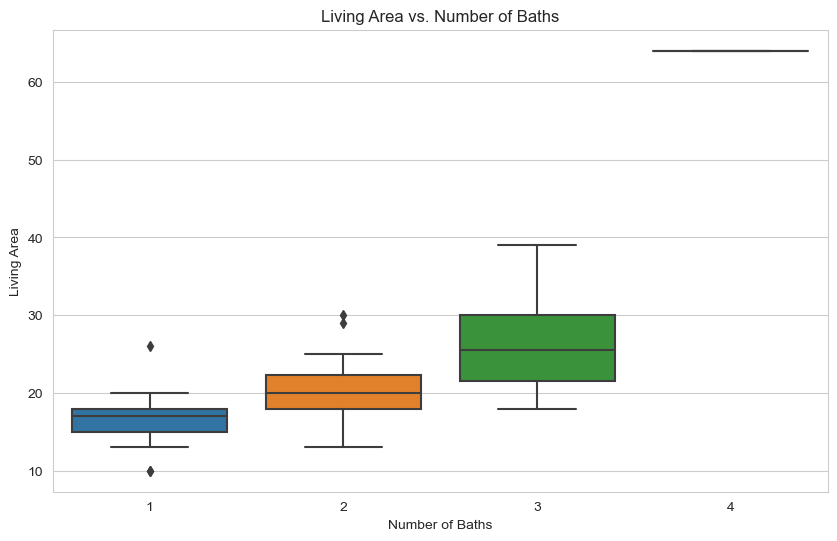

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

#Distribution of Selling Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_homes['Sell'], bins=20, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

#Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_homes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

#Boxplot for Living Area vs. Number of Baths
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_homes[' "Baths"'], y=df_homes[' "Living"'])
plt.title('Living Area vs. Number of Baths')
plt.xlabel('Number of Baths')
plt.ylabel('Living Area')
plt.show()



Distribution of Selling Prices: To understand the range and distribution of selling prices within the dataset.

The selling price is a crucial factor in real estate analysis, offering insights into market trends, affordability, and investment opportunities. Analyzing its distribution helps identify common price ranges and outliers, informing both buyers and sellers about the current market dynamics.

The histogram reveals that most homes are concentrated in the lower price range, specifically around 150,000 to 160,000, indicating a market dominated by properties affordable to a broader population. The presence of a long tail towards the higher price end suggests fewer luxury properties are also part of the dataset, which are sold at significantly higher prices.

Correlation Heatmap: To identify the relationships between different numerical features of the homes.

Understanding how different features correlate with each other, especially with the selling price, can pinpoint factors that significantly impact home values. This analysis aids in predicting price based on various home characteristics and can guide investment and marketing strategies.

The heatmap shows positive correlations between the selling price and several features like the listing price, living area, number of rooms, and number of baths. This indicates that as these features increase (e.g., larger living areas or more rooms), the selling price tends to increase as well. The strong correlation between the selling and listing prices was expected and validates the consistency in market valuations.

Living Area vs. Number of Baths: To explore the relationship between the size of the living area and the number of bathrooms in homes.

The size of the living area and the number of bathrooms are key factors that can affect a home's functionality, appeal, and ultimately its price. This analysis helps understand market preferences and trends in home design.

The boxplot indicates that homes with more bathrooms generally have larger living areas. This trend aligns with expectations, as larger homes can accommodate more bathrooms. The plot also shows variation in living area sizes for homes with the same number of bathrooms, suggesting other factors also influence living area size apart from the number of bathrooms.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_homes[[' "Taxes"']]  
y = df_homes['Sell']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model_output = {
    'Coefficient (Taxes)': model.coef_[0],
    'Intercept': model.intercept_,
    'Mean Squared Error': mse,
    'R-squared': r2
}

model_output


{'Coefficient (Taxes)': 0.04089929922400107,
 'Intercept': 22.854338363987353,
 'Mean Squared Error': 751.2434276370644,
 'R-squared': -0.31345448569316803}

Model Coefficients:
Intercept: 22.85
Coefficient for Taxes: 0.0409

The coefficient for Taxes indicates a slight positive relationship with the Selling Price. Specifically, for each unit increase in taxes, the selling price is expected to increase by 0.0409 units. This suggests that higher taxes are associated with slightly higher selling prices.

Performance Metrics:
Mean Squared Error: 751.24
R-squared: -0.31

MSE measures the average squared difference between the estimated values and the actual value. A lower MSE is preferred as it indicates a closer fit to the data. In this case, the MSE is 751.24, which needs context regarding the range of selling prices to fully evaluate its significance.

R-squaredassesses the proportion of variance in the dependent variable that can be explained by the independent variable(s) in the model. An R² value of -0.31 is highly unusual as R² is typically between 0 and 1. A negative R² indicates that the model performs worse than a simple horizontal line representing the mean of the dependent variable across the dataset. This suggests that the model, with taxes as the sole predictor, does not effectively capture the variance in selling prices.

Taxes as a Predictor: The data indicates that taxes are not a strong predictor for selling price. While there's a theoretically positive relationship, the magnitude of the effect (coefficient value) is minimal.
Model Fit and Effectiveness: The negative R² value is a strong indicator that the model does not adequately explain the variability in selling prices. This suggests that taxes alone do not provide enough information to accurately predict the selling price of homes in the dataset.

In [15]:
# Choosing "Living" area as the new independent variable
X_new = df_homes[[' "Living"']]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

linear_regressor_new = LinearRegression()
linear_regressor_new.fit(X_train_new, y_train_new)

y_pred_new = linear_regressor_new.predict(X_test_new)

mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

intercept_new = linear_regressor_new.intercept_
coefficient_new = linear_regressor_new.coef_[0]

intercept_new, coefficient_new, mse_new, r2_new


(5.425882352941159,
 7.8067397806580265,
 837.4397897851013,
 -0.46415796521627617)

Linear Regression Model Using Living Area as the Independent Variable

Model Coefficients:
Intercept: 5.43
Coefficient for Living Area: 7.81

This model suggests that for each unit increase in living area, the selling price is expected to increase by approximately 7.81 units. This indicates a positive relationship between the living area of a home and its selling price.

Performance Metrics:
Mean Squared Error (MSE): 837.44
R-squared: -0.46

MSE has slightly increased compared to the model using taxes as the predictor, suggesting that predictions from this model may be further from the actual values. The R2 value has also decreased, further into negative territory, indicating an even poorer fit of the model to the data than the previous model using taxes as the predictor.

Comparing the Models

Taxes as Predictor: The model had an MSE of 751.24 and an R² of -0.31.
Living Area as Predictor: This model has an MSE of 837.44 and an R² of -0.46.

Based on these metrics, the model using taxes as the independent variable is "better" in terms of having a lower MSE and a less negative R² value. However, it's important to note that both models perform poorly in explaining the variance in selling prices, as indicated by the negative R² values.

Limitations of the Models

Single Variable Limitation: Both models are simplistic, relying on a single variable to predict the selling price. Real estate pricing is influenced by a complex interplay of factors, including location, condition, size, amenities, and market trends, which are not captured by these models.

Negative R² Values: The negative R² values indicate that the models are not suitable for predicting selling prices based on either taxes or living area alone. This suggests that more variables or a different modeling approach might be necessary.

Overfitting/Underfitting: Although not directly observable from the provided metrics, using a single variable for prediction can lead to underfitting, where the model is too simplistic to capture the underlying trends in the data.